# Exploratory Data Analysis (EDA) on Obesity dataset
## 1)  DATA LOADING & CLEANING
In the first phase of the assignment, we load the dataset, determine how many variables and observations we have available, and understand their nature. We also check for missing values and then look for a solution to the problem.
### 1.1) Data Loading
let us import the libraries necessary for the code to function correctly

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

We load the dataset and display the first few rows:

In [2]:
dataset = pd.read_csv("Obesity.csv")
display(dataset.head())

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

We list the variables present, showing their type:

In [3]:
display(dataset.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
var_numeriche = dataset.select_dtypes(include=["float64"]).columns
var_categoriche = dataset.select_dtypes(exclude=["float64"]).columns
print("\033[1m" + f"\n Numeric variables: {list(var_numeriche)} \n")
print("\033[1m" + f"\n Categorical variables: {list(var_categoriche)} \n")


 Numeric variables: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 


 Categorical variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] 



We can further subdivide categorical variables into **Nominals** e **Ordinals**: <br><br>
**NOMINALS**
1. Gender (Male/Female)

2. family_history_with_overweight (yes/no)

3. FAVC (yes/no)

4. SMOKE (yes/no)

5. SCC (yes/no)

6. MTRANS (Public_Transportation, Automobile, Walking, Motorbike, Bike) <br><br>

**ORDINALS**

1. CAEC (no, Sometimes, Frequently, Always)

2. CALC (no, Sometimes, Frequently, Always)

3. NObeyesdad (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III) (**Target Variable**)

### 1.2) Dataset size
Now let's view the number of observations and variables present:

In [5]:
print("\033[1m" + f"\n The dataset contains {dataset.shape[0]} observations and {dataset.shape[1]} variables.\n")


 The dataset contains 2114 observations and 17 variables.



For convenience, we have chosen to rename some of the variables in order to facilitate operations.

In [6]:
dataset.rename(columns={"FAVC": "High_Caloric_Food", 
                        "FCVC": "Vegetable_Consumption", 
                        "NCP": "Main_Meals_Per_Day", 
                        "CAEC": "Food_Between_Meals", 
                        "CH2O": "Water_Intake", 
                        "SCC": "Calorie_Monitoring", 
                        "FAF": "Physical_Activity_Frequency", 
                        "TUE": "Tech_use_Time", 
                        "CALC": "Alcohol_Consumption", 
                        "MTRANS": "Transport_Mode", 
                        "NObeyesdad": "Obesity_Level",}, inplace=True)

var_numeriche = dataset.select_dtypes(include=["float64"]).columns
var_categoriche = dataset.select_dtypes(exclude=["float64"]).columns

print("\033[1m" + f"\n Numerical variables : {list(var_numeriche)} \n")
print("\033[1m" + f"\n Categorical variables: {list(var_categoriche)} \n")


 Numerical variables : ['Age', 'Height', 'Weight', 'Vegetable_Consumption', 'Main_Meals_Per_Day', 'Water_Intake', 'Physical_Activity_Frequency', 'Tech_use_Time'] 


 Categorical variables: ['Gender', 'family_history_with_overweight', 'High_Caloric_Food', 'Food_Between_Meals', 'SMOKE', 'Calorie_Monitoring', 'Alcohol_Consumption', 'Transport_Mode', 'Obesity_Level'] 



Following some inconsistencies found between the numerical values in the dataset, we cleaned the data to ensure greater accuracy. <br>
First, we standardised the unit of measurement for height to centimetres rather than metres to avoid potential approximation errors. <br>
Next, we rounded all numerical values. The changes made are detailed below.

In [7]:
dataset["Height"] *= 100
dataset[var_numeriche] = dataset[var_numeriche].round().astype(int)
dataset

Gender  Age  Height  Weight family_history_with_overweight  \
0     Female   21     162      64                            yes   
1     Female   21     152      56                            yes   
2       Male   23     180      77                            yes   
3       Male   27     180      87                             no   
4       Male   22     178      90                             no   
...      ...  ...     ...     ...                            ...   
2109  Female   21     171     131                            yes   
2110  Female   22     175     134                            yes   
2111  Female   23     175     134                            yes   
2112  Female   24     174     133                            yes   
2113  Female   24     174     133                            yes   

     High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
0                   no                      2                   3   
1                   no                      3                   3   
2                   no                      2                   3   
3                   no                      3                   3   
4                   no                      2                   1   
...                ...                    ...                 ...   
2109               yes                      3                   3   
2110               yes                      3                   3   
2111               yes                      3                   3   
2112               yes                      3                   3   
2113               yes                      3                   3   

     Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
0             Sometimes    no             2                 no   
1             Sometimes   yes             3                yes   
2             Sometimes    no             2                 no   
3             Sometimes    no             2                 no   
4             Sometimes    no             2                 no   
...                 ...   ...           ...                ...   
2109          Sometimes    no             2                 no   
2110          Sometimes    no             2                 no   
2111          Sometimes    no             2                 no   
2112          Sometimes    no             3                 no   
2113          Sometimes    no             3                 no   

      Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
0                               0              1                  no   
1                               3              0           Sometimes   
2                               2              1          Frequently   
3                               2              0          Frequently   
4                               0              0           Sometimes   
...                           ...            ...                 ...   
2109                            2              1           Sometimes   
2110                            1              1           Sometimes   
2111                            1              1           Sometimes   
2112                            1              1           Sometimes   
2113                            1              1           Sometimes   

             Transport_Mode        Obesity_Level  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  
2111  Public_Transportation     Obesity_Type_III  
2112  Public_Transportation     Obesity_Type_III  
2113  Public_Transportation     Obesity_Type_III  

[2114 rows x 17 columns]

### 1.3) Missing Values
We check for missing values within the data for each variable:

In [8]:
print("\033[1m" + "\nMissing values for each variable\n")
missing_values = dataset.isna().sum()
missing_values


Missing values for each variable



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               5
Transport_Mode                    0
Obesity_Level                     1
dtype: int64

In [9]:
missing_values_percent = ((missing_values/len(dataset))*100).round(2)
missing_values_table = pd.DataFrame({"Missing Values": missing_values, "% del totale": missing_values_percent})
display(missing_values_table[missing_values_table["Missing Values"] > 0])

Missing Values  % del totale
Alcohol_Consumption               5          0.24
Obesity_Level                     1          0.05

We can see that there are five missing values relating to alcohol consumption and only one missing value relating to obesity levels. <br> Let's see which row they correspond to: 

In [10]:
print("\033[1m" + "\nMissing values relating to alcohol consumption:\n")
dataset[dataset["Alcohol_Consumption"].isna()] 


Missing values relating to alcohol consumption:



Gender  Age  Height  Weight family_history_with_overweight  \
13     Male   41     180      99                             no   
94   Female   24     160      48                             no   
162  Female   21     163      60                            yes   
278  Female   32     157      57                            yes   
463    Male   17     180      68                            yes   

    High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
13                yes                      2                   3   
94                yes                      3                   3   
162               yes                      3                   3   
278               yes                      3                   3   
463                no                      2                   3   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
13           Sometimes    no             2                 no   
94           Sometimes    no             2                 no   
162             Always   yes             2                 no   
278          Sometimes    no             2                 no   
463          Sometimes    no             1                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
13                             2              1                 NaN   
94                             2              0                 NaN   
162                            2              0                 NaN   
278                            0              0                 NaN   
463                            2              1                 NaN   

            Transport_Mode   Obesity_Level  
13              Automobile  Obesity_Type_I  
94   Public_Transportation   Normal_Weight  
162  Public_Transportation   Normal_Weight  
278             Automobile   Normal_Weight  
463  Public_Transportation   Normal_Weight

In [11]:
print("\033[1m" + "\n Missing values referring to obesity level\n")
dataset[dataset["Obesity_Level"].isna()] 


 Missing values referring to obesity level



Gender  Age  Height  Weight family_history_with_overweight  \
376  Female   36     158      60                            yes   

    High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
376                no                      3                   3   

    Food_Between_Meals SMOKE  Water_Intake Calorie_Monitoring  \
376          Sometimes    no             1                 no   

     Physical_Activity_Frequency  Tech_use_Time Alcohol_Consumption  \
376                            2              0           Sometimes   

    Transport_Mode Obesity_Level  
376     Automobile           NaN

### 1.4) Handling missing values
During the dataset analysis phase, and more specifically when checking for missing data, we noticed the absence of 5 observations for the variable relating to alcohol consumption and 1 observation for the variable relating to obesity levels, both of which are categorical. <br>
We therefore note the absence of 6 observations out of 2,114. These represent approximately 0.3% of the entire dataset, so we can say that we can continue to operate by removing the missing values, since continuing with mode-based imputation would result in a high level of complexity that would not benefit the analysis. <br> We could also say that with the imputation of missing values, the risk of introducing a bias, albeit certainly irrelevant, outweighs the benefit of doing so.

In [12]:
dataset_clean = dataset.dropna()
missing_values = dataset_clean.isna().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
High_Caloric_Food                 0
Vegetable_Consumption             0
Main_Meals_Per_Day                0
Food_Between_Meals                0
SMOKE                             0
Water_Intake                      0
Calorie_Monitoring                0
Physical_Activity_Frequency       0
Tech_use_Time                     0
Alcohol_Consumption               0
Transport_Mode                    0
Obesity_Level                     0
dtype: int64

In [13]:
print("\033[1m" + "IMPACT ANALYSIS OF REMOVING MISSING VALUES\n")

# Original dataset vs. cleaned dataset
original_shape = dataset.shape
clean_shape = dataset_clean.shape

print(f"Original dataset: {original_shape[0]} observations")
print(f"Clean dataset: {clean_shape[0]} observations")
print(f"Removed comments: {original_shape[0] - clean_shape[0]} ({((original_shape[0] - clean_shape[0])/original_shape[0])*100:.2f}%)\n")

IMPACT ANALYSIS OF REMOVING MISSING VALUES

Original dataset: 2114 observations
Clean dataset: 2108 observations
Removed comments: 6 (0.28%)



## 2) Univariate Data Description 
We perform a statistical analysis that examines and summarises the characteristics of each variable individually, using measures of central tendency, dispersion and distribution.
. <br>
# 2.1) Descriprtive Statistics
Let's start by calculating the main descriptive statistics for the cleaned dataset.. <br>
For numerical variables, the following were calculated:: <br>
1. Number of non-null observations
2. Mean
3. Standard Deviation
4. Minimum value
5. First quartile (Q1)
6. Median - Second quartile (Q2)
7. Third quartile (Q3)
8. Maximum Value
9. Skewness
10. Kurtosis

As regards categorical variables: <br>
1. Number of non-null observations
2. Number of unique categories
3. Most frequent category
4. Frequency of the most frequent category

In [14]:
var_numeriche = dataset_clean.select_dtypes(include=[np.number]).columns
var_categoriche = dataset_clean.select_dtypes(include=["object"]).columns

print("\nDescriptive statistics relating to numerical variables: \n")
stats_n = dataset_clean[var_numeriche].describe()
stats_n.rename(index={"50%": "median"}, inplace=True)
stats_n.loc["skewness"] = dataset_clean.skew(numeric_only=True)
stats_n.loc["kurtosis"] = dataset_clean.kurt(numeric_only=True)
stats_n = stats_n.round(2)
display(stats_n)

print("\nDescriptive statistics for categorical variables: \n")
stats_c = dataset_clean[var_categoriche].describe()
stats_c = stats_c.round(2)
display(stats_c)


Descriptive statistics relating to numerical variables: 



Age   Height   Weight  Vegetable_Consumption  \
count     2108.00  2108.00  2108.00                2108.00   
mean        24.30   170.17    86.61                   2.42   
std          6.34     9.33    26.20                   0.59   
min         14.00   145.00    39.00                   1.00   
25%         20.00   163.00    66.00                   2.00   
median      23.00   170.00    83.00                   2.00   
75%         26.00   177.00   107.25                   3.00   
max         61.00   198.00   173.00                   3.00   
skewness     1.53    -0.01     0.25                  -0.43   
kurtosis     2.84    -0.56    -0.70                  -0.70   

          Main_Meals_Per_Day  Water_Intake  Physical_Activity_Frequency  \
count                2108.00       2108.00                      2108.00   
mean                    2.69          2.02                         1.01   
std                     0.81          0.69                         0.90   
min                     1.00          1.00                         0.00   
25%                     3.00          2.00                         0.00   
median                  3.00          2.00                         1.00   
75%                     3.00          2.00                         2.00   
max                     4.00          3.00                         3.00   
skewness               -1.06         -0.02                         0.46   
kurtosis                0.37         -0.89                        -0.71   

          Tech_use_Time  
count           2108.00  
mean               0.67  
std                0.67  
min                0.00  
25%                0.00  
median             1.00  
75%                1.00  
max                2.00  
skewness           0.52  
kurtosis          -0.76


Descriptive statistics for categorical variables: 



Gender family_history_with_overweight High_Caloric_Food  \
count    2108                           2108              2108   
unique      2                              2                 2   
top      Male                            yes               yes   
freq     1067                           1722              1864   

       Food_Between_Meals SMOKE Calorie_Monitoring Alcohol_Consumption  \
count                2108  2108               2108                2108   
unique                  4     2                  2                   4   
top             Sometimes    no                 no           Sometimes   
freq                 1763  2065               2012                1399   

               Transport_Mode   Obesity_Level  
count                    2108            2108  
unique                      5               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1579             350

In [15]:
print("\nFrequency tables: \n")

for var in var_categoriche:
    freq = dataset_clean[var].value_counts()
    perc = dataset_clean[var].value_counts(normalize=True) * 100

    table = pd.DataFrame({
        "Frequency": freq,
        "Percentage (%)": perc.round(2)
    })

    display(table)
    print("\n")



Frequency tables: 



Frequency  Percentage (%)
Gender                           
Male         1067           50.62
Female       1041           49.38

Frequency  Percentage (%)
family_history_with_overweight                           
yes                                  1722           81.69
no                                    386           18.31

Frequency  Percentage (%)
High_Caloric_Food                           
yes                     1864           88.43
no                       244           11.57

Frequency  Percentage (%)
Food_Between_Meals                           
Sometimes                1763           83.63
Frequently                242           11.48
Always                     52            2.47
no                         51            2.42

Frequency  Percentage (%)
SMOKE                           
no          2065           97.96
yes           43            2.04

Frequency  Percentage (%)
Calorie_Monitoring                           
no                       2012           95.45
yes                        96            4.55

Frequency  Percentage (%)
Alcohol_Consumption                           
Sometimes                 1399           66.37
no                         639           30.31
Frequently                  69            3.27
Always                       1            0.05

Frequency  Percentage (%)
Transport_Mode                                  
Public_Transportation       1579           74.91
Automobile                   455           21.58
Walking                       56            2.66
Motorbike                     11            0.52
Bike                           7            0.33

Frequency  Percentage (%)
Obesity_Level                                 
Obesity_Type_I             350           16.60
Obesity_Type_III           324           15.37
Obesity_Type_II            297           14.09
Overweight_Level_I         291           13.80
Overweight_Level_II        290           13.76
Normal_Weight              282           13.38
Insufficient_Weight        274           13.00


 Distributions of numerical variables: 



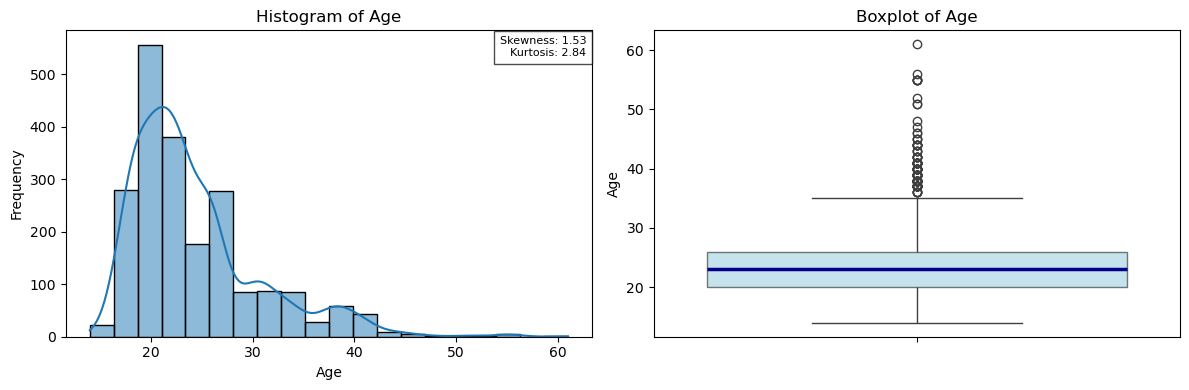

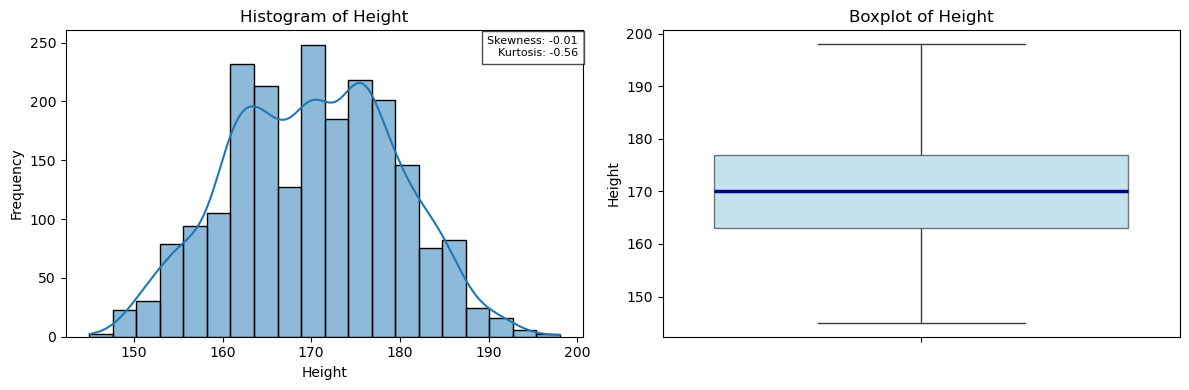

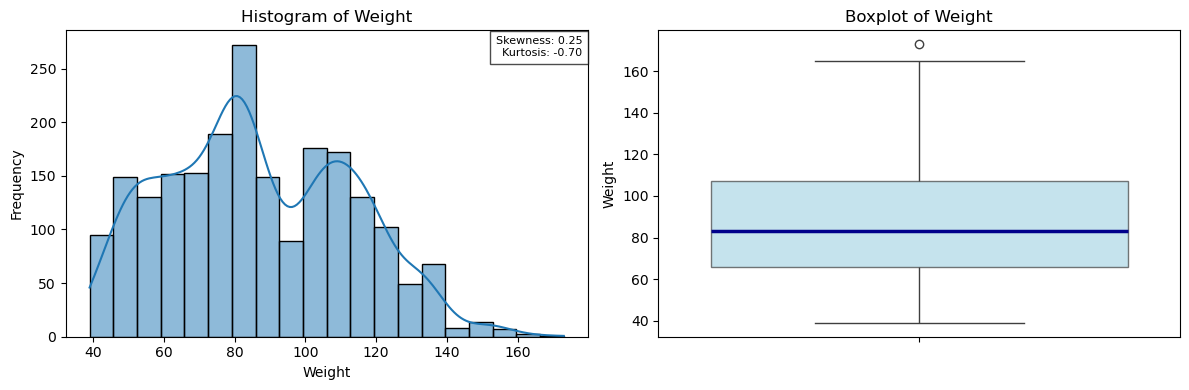

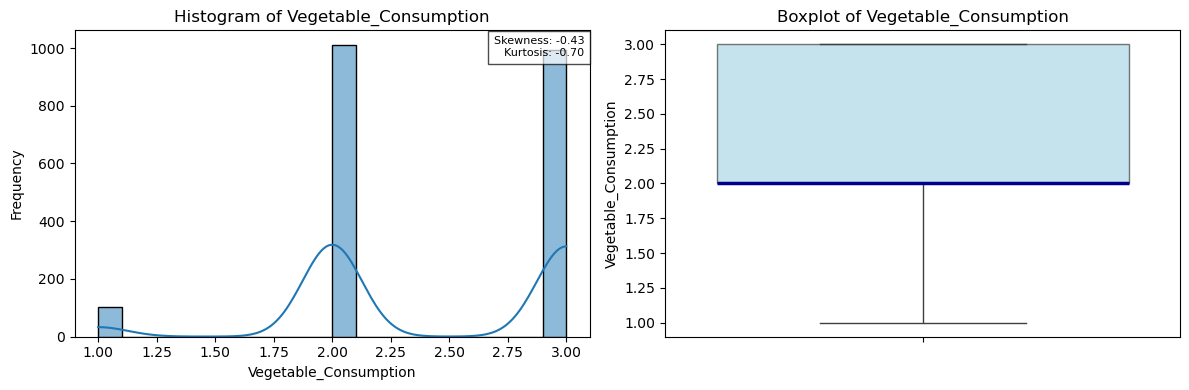

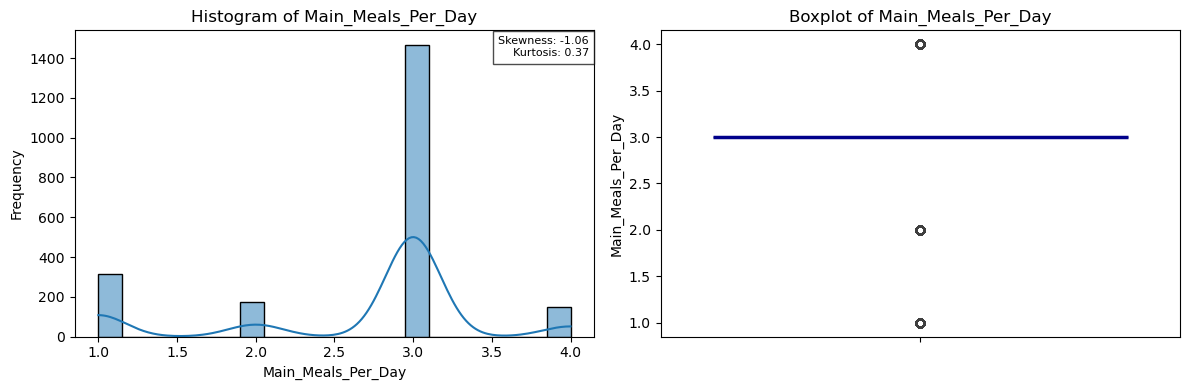

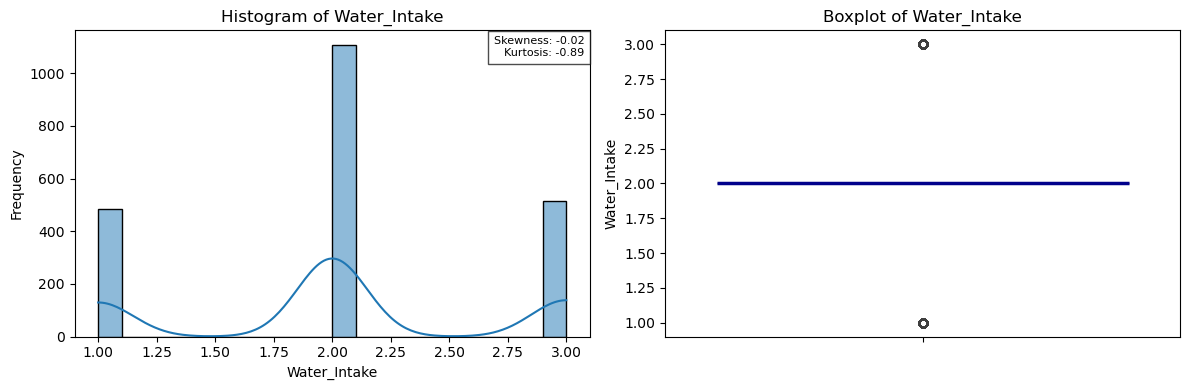

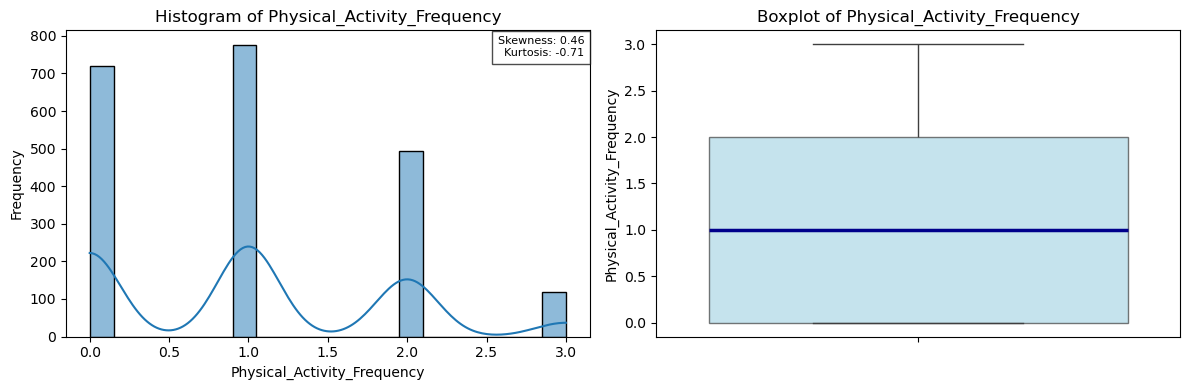

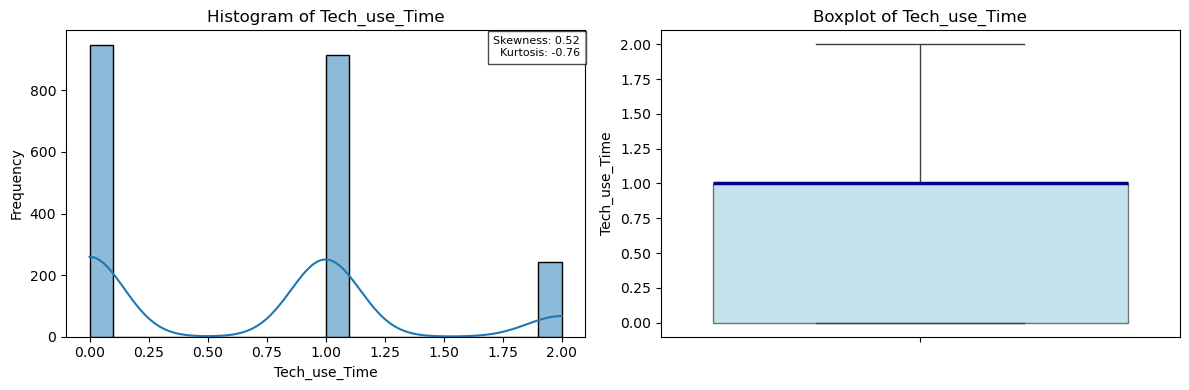

In [16]:
print("\n Distributions of numerical variables: \n")

for var in var_numeriche:
    skew_val = dataset_clean[var].skew()
    kurt_val = dataset_clean[var].kurt()

    # Figure with 2 side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- HISTOGRAM ---
    sns.histplot(dataset_clean[var], kde=True, bins=20, ax=axes[0], )
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Frequency")
    

    # Text skew + kurtosis
    axes[0].text(
        0.99, 0.98,
        f"Skewness: {skew_val:.2f}\nKurtosis: {kurt_val:.2f}",
        ha="right", va="top",
        transform=axes[0].transAxes,
        fontsize=8,
        bbox=dict(facecolor="white", edgecolor="black", alpha=0.7)
    )

    # --- BOXPLOT ---
    sns.boxplot(y=dataset_clean[var], ax=axes[1], boxprops=dict(facecolor="lightblue", alpha=0.7), medianprops=dict(color="darkblue", linewidth=2.5))
    axes[1].set_title(f"Boxplot of {var}")
    axes[1].set_ylabel(var)

    plt.tight_layout()
    plt.show()


 Distributions of categorical variables: 



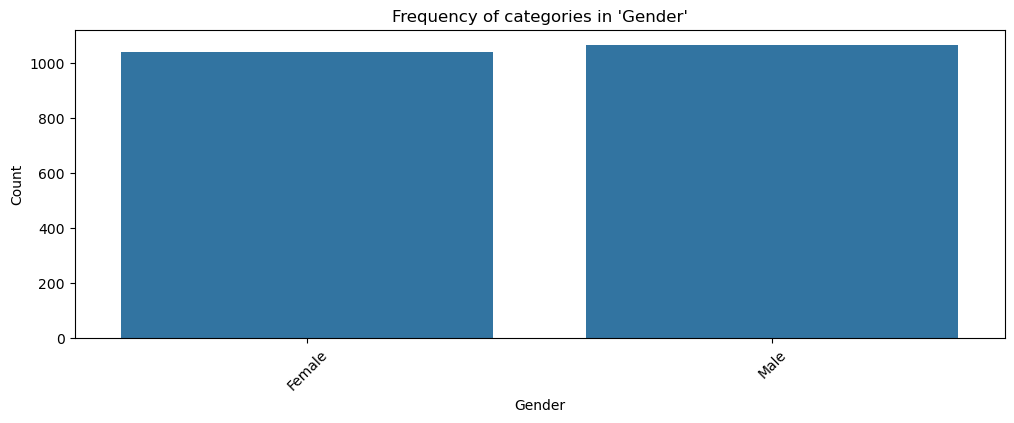

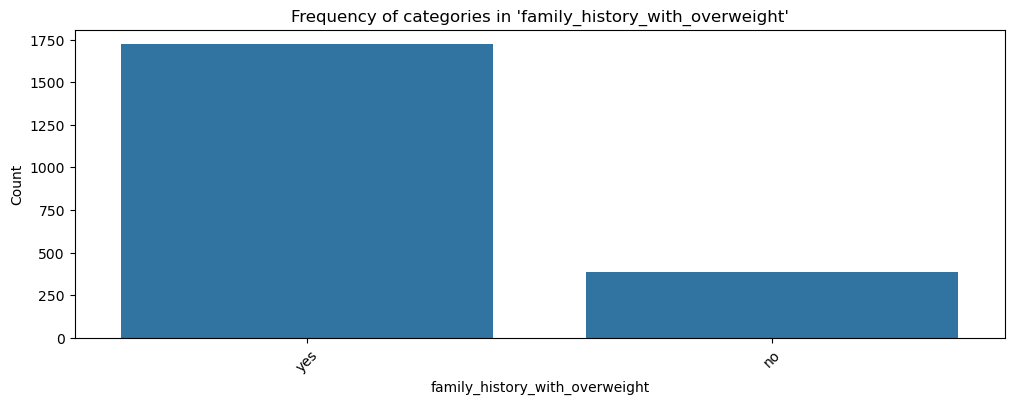

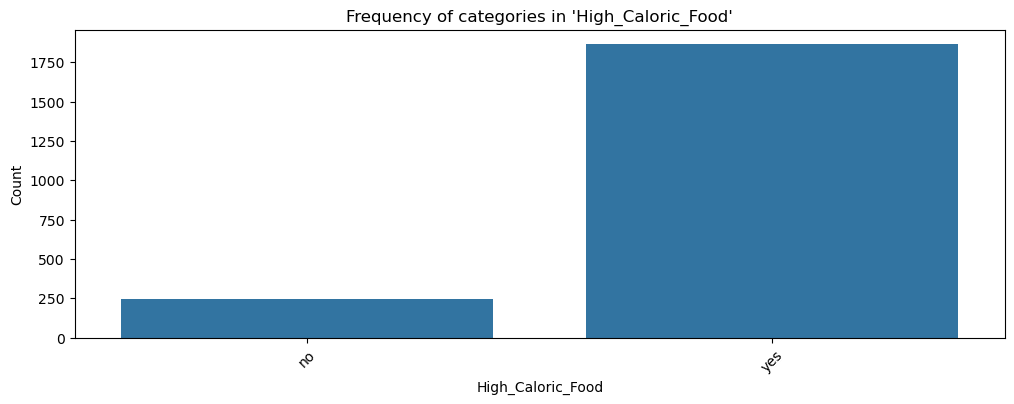

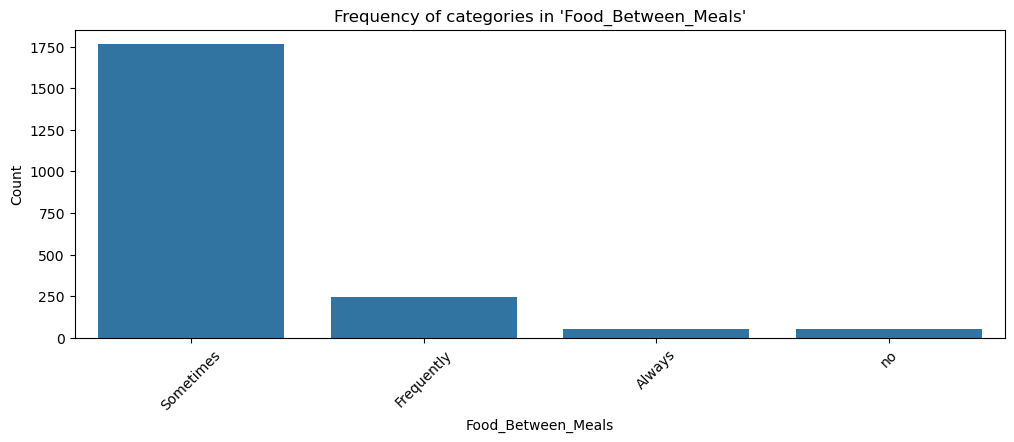

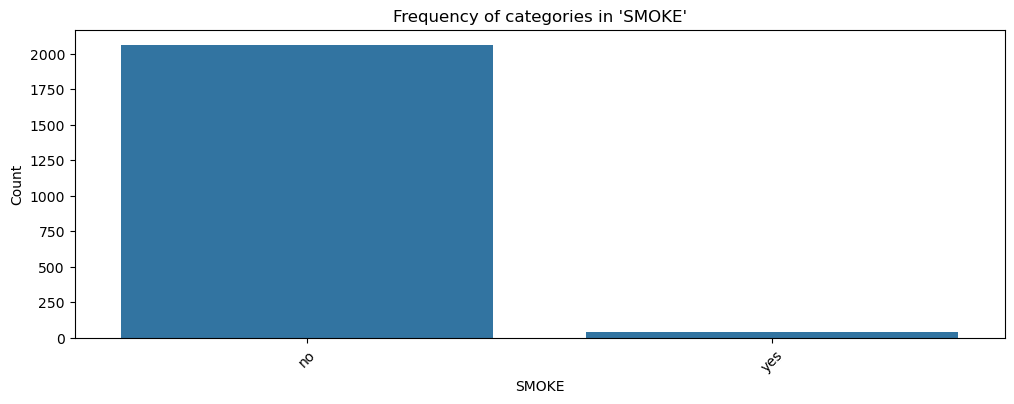

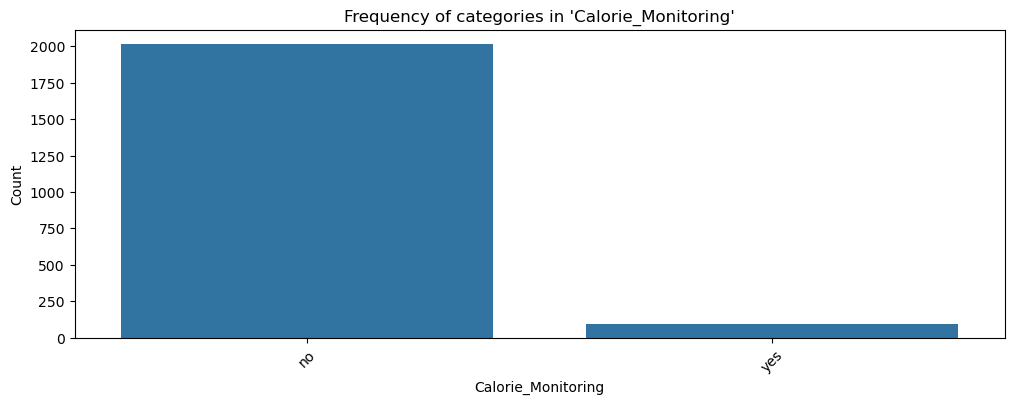

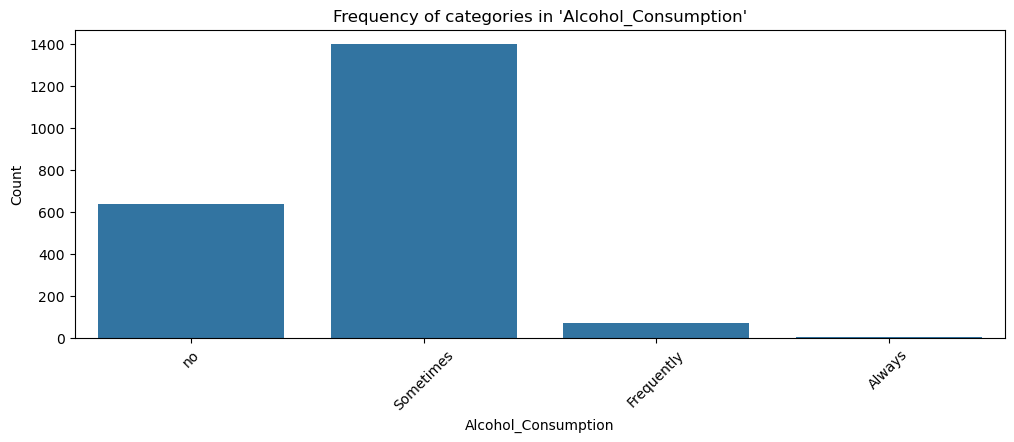

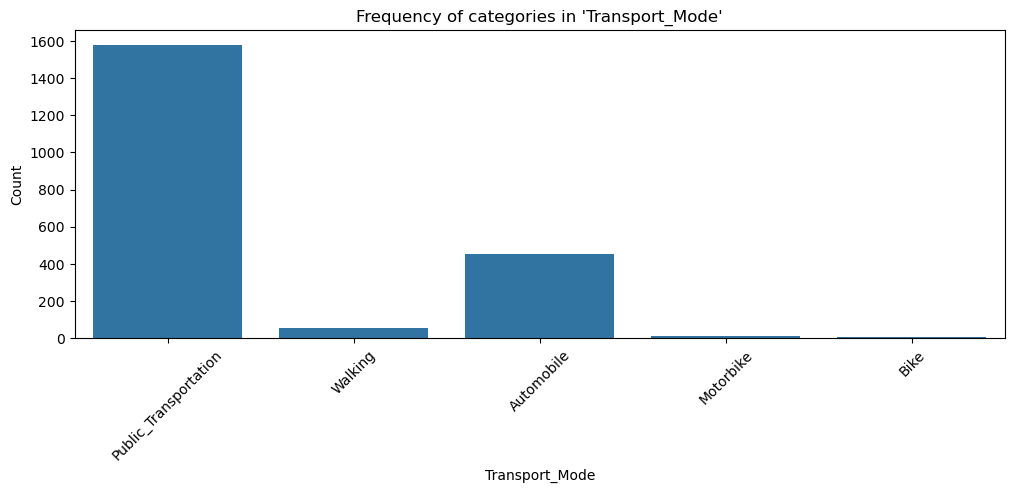

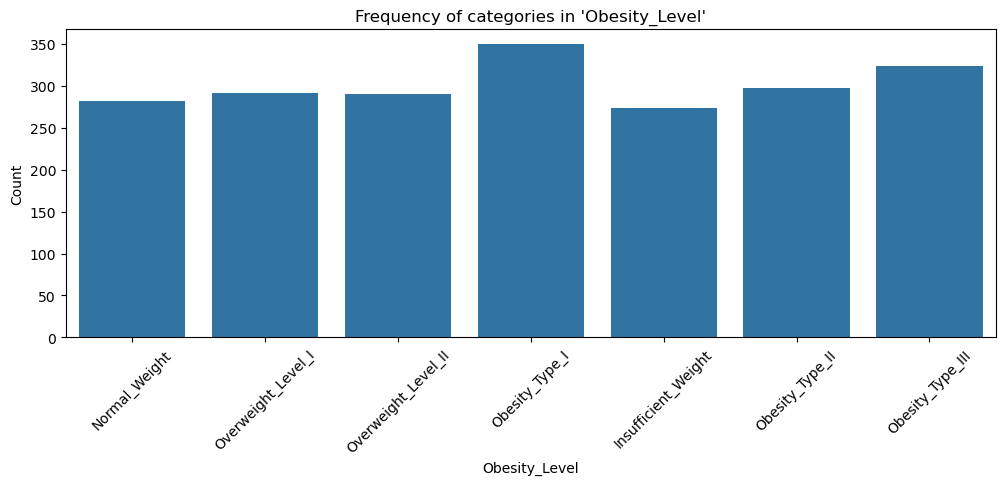

In [17]:
print("\n Distributions of categorical variables: \n")
for var in var_categoriche:
    plt.figure(figsize=(12,4))
    sns.countplot(x=dataset_clean[var])
    plt.title(f"Frequency of categories in '{var}'")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [18]:
print("\n Correlation matrix:")
corr_matrix = dataset_clean[var_numeriche].corr()
display(corr_matrix)


 Correlation matrix:


Age    Height    Weight  \
Age                          1.000000 -0.024472  0.205404   
Height                      -0.024472  1.000000  0.461006   
Weight                       0.205404  0.461006  1.000000   
Vegetable_Consumption        0.005448 -0.052556  0.182530   
Main_Meals_Per_Day          -0.044218  0.245038  0.103514   
Water_Intake                -0.023532  0.181219  0.185917   
Physical_Activity_Frequency -0.135487  0.290934 -0.048198   
Tech_use_Time               -0.286577  0.055679 -0.042439   

                             Vegetable_Consumption  Main_Meals_Per_Day  \
Age                                       0.005448           -0.044218   
Height                                   -0.052556            0.245038   
Weight                                    0.182530            0.103514   
Vegetable_Consumption                     1.000000            0.008497   
Main_Meals_Per_Day                        0.008497            1.000000   
Water_Intake                              0.062980            0.063744   
Physical_Activity_Frequency               0.013910            0.129107   
Tech_use_Time                            -0.075916            0.014118   

                             Water_Intake  Physical_Activity_Frequency  \
Age                             -0.023532                    -0.135487   
Height                           0.181219                     0.290934   
Weight                           0.185917                    -0.048198   
Vegetable_Consumption            0.062980                     0.013910   
Main_Meals_Per_Day               0.063744                     0.129107   
Water_Intake                     1.000000                     0.119169   
Physical_Activity_Frequency      0.119169                     1.000000   
Tech_use_Time                   -0.029973                     0.056380   

                             Tech_use_Time  
Age                              -0.286577  
Height                            0.055679  
Weight                           -0.042439  
Vegetable_Consumption            -0.075916  
Main_Meals_Per_Day                0.014118  
Water_Intake                     -0.029973  
Physical_Activity_Frequency       0.056380  
Tech_use_Time                     1.000000

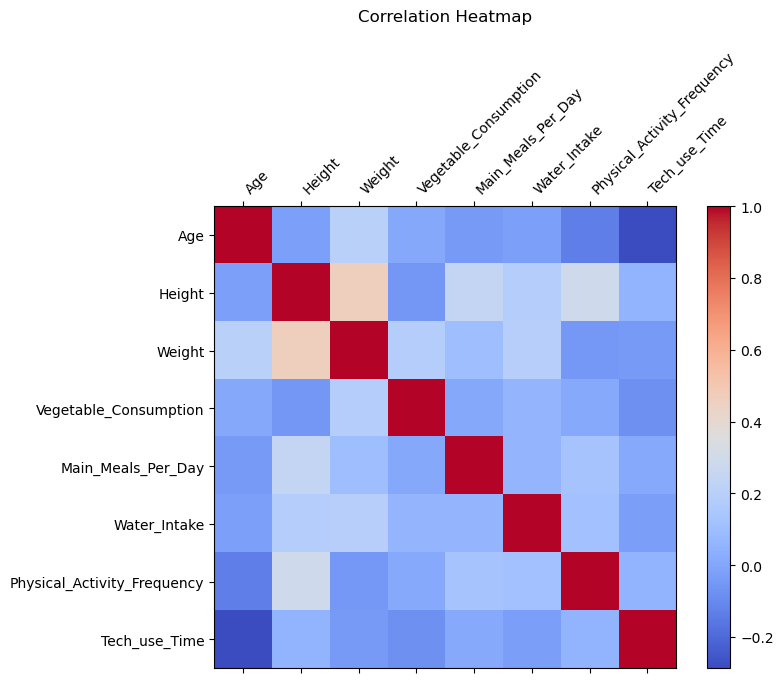

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
fig.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)
plt.title("Correlation Heatmap", pad=20)
plt.show()

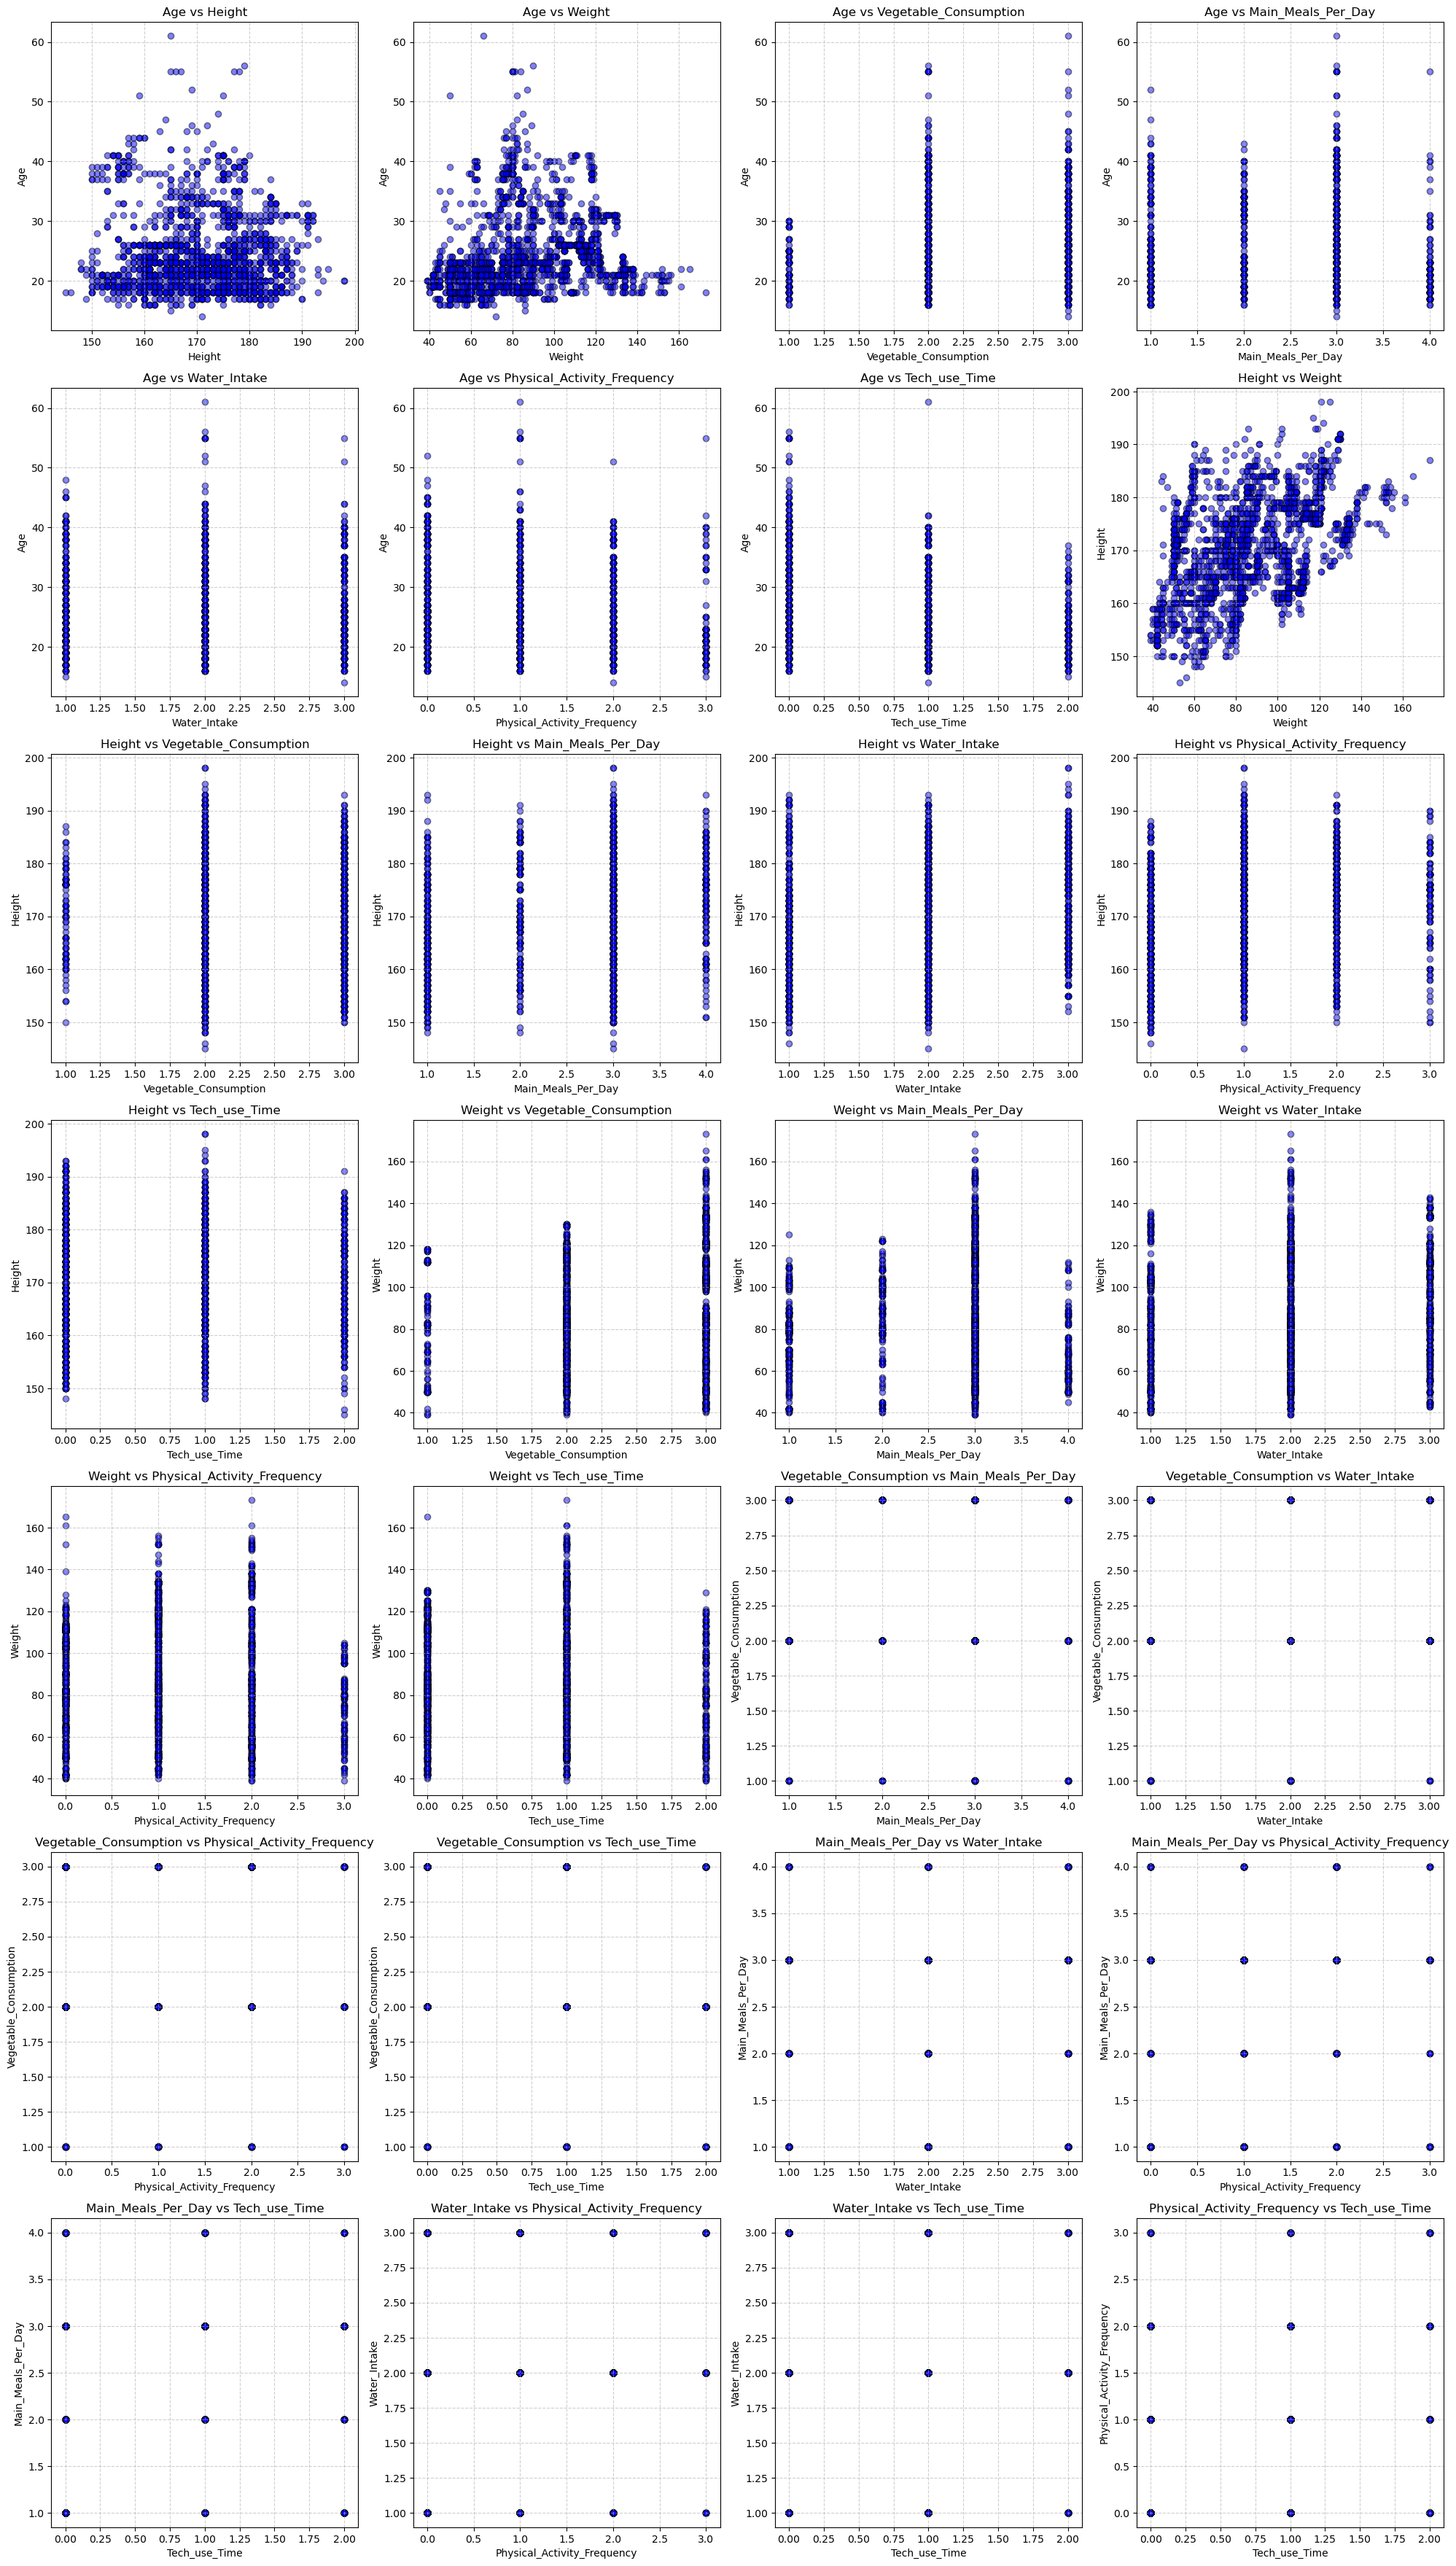

In [20]:
n_vars = len(var_numeriche)

# Calculate total number of combinations
total_plots = n_vars * (n_vars - 1)  # Tutte le coppie diverse

# Create optimal grid
n_cols = min(4, n_vars)  # Maximum 4 columns
n_rows = (total_plots + n_cols - 1) // n_cols  # Calculation of required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]  # Flatten the array

plot_index = 0
for i, var1 in enumerate(var_numeriche):
    for j, var2 in enumerate(var_numeriche):
        if j > i:  # use only unordered pairs
            ax = axes[plot_index]
            ax.scatter(dataset_clean[var2], dataset_clean[var1],
                       alpha=0.5, color="blue", edgecolors="black")
            ax.set_title(f"{var1} vs {var2}")
            ax.set_xlabel(var2)
            ax.set_ylabel(var1)
            ax.grid(True, linestyle="--", alpha=0.6)
            plot_index += 1

# Hide unused axes
for idx in range(plot_index, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

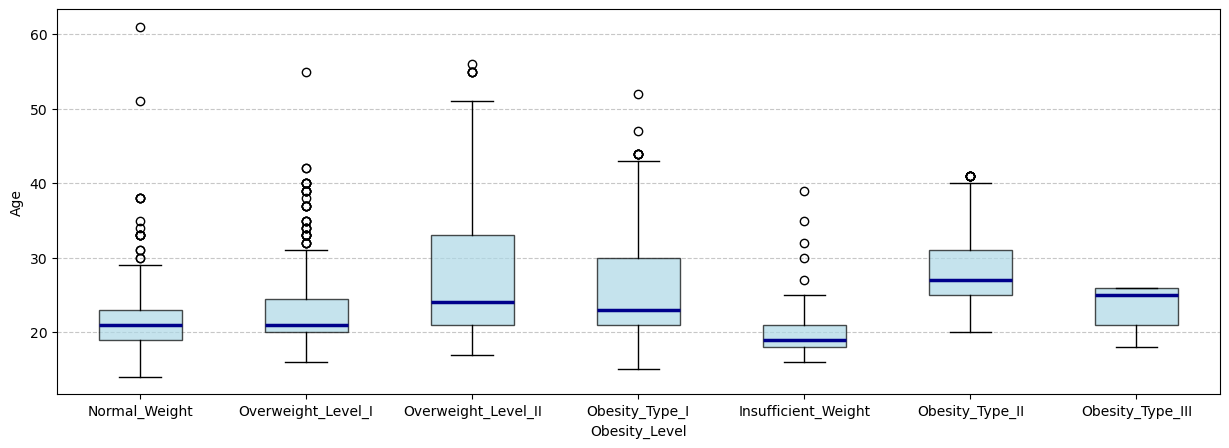

In [21]:
# Comparison of a numerical variable with a categorical variable
# (Example: age distribution for each level of obesity)
target = "Obesity_Level"  # name of the target variable

if target in dataset_clean.columns:
    first_numvar = var_numeriche[0]  # first numerical variable
    categories = dataset_clean[target].unique()
    plt.figure(figsize=(15,5))
    data_to_plot = [dataset_clean[dataset_clean[target] == cat][first_numvar] for cat in categories]
    plt.boxplot(data_to_plot, tick_labels=categories, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha = 0.7), medianprops=dict(color='darkblue', linewidth=2.5)) 
    plt.xlabel(target)
    plt.ylabel(first_numvar)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

In [22]:
categorical_pairs = [(var_categoriche[i], var_categoriche[j])
                     for i in range(len(var_categoriche))
                         for j in range(i+1, len(var_categoriche))]

print("\nContingency tables:")
for var1, var2 in categorical_pairs:  
    print(f"\n{var1} vs {var2}")
    display(pd.crosstab(dataset_clean[var1], dataset_clean[var2]))


Contingency tables:

Gender vs family_history_with_overweight


family_history_with_overweight   no  yes
Gender                                  
Female                          233  808
Male                            153  914


Gender vs High_Caloric_Food


High_Caloric_Food   no  yes
Gender                     
Female             143  898
Male               101  966


Gender vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
Gender                                               
Female                  22         161        843  15
Male                    30          81        920  36


Gender vs SMOKE


SMOKE     no  yes
Gender           
Female  1027   14
Male    1038   29


Gender vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Gender                       
Female               971   70
Male                1041   26


Gender vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Gender                                                 
Female                    0          28        710  303
Male                      1          41        689  336


Gender vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
Gender                                                                     
Female                 164     0          2                    854       21
Male                   291     7          9                    725       35


Gender vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                              
Female                         175            137             156   
Male                            99            145             194   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                                 
Female                       2               323                 145   
Male                       295                 1                 146   

Obesity_Level  Overweight_Level_II  
Gender                              
Female                         103  
Male                           187


family_history_with_overweight vs High_Caloric_Food


High_Caloric_Food                no   yes
family_history_with_overweight           
no                              100   286
yes                             144  1578


family_history_with_overweight vs Food_Between_Meals


Food_Between_Meals              Always  Frequently  Sometimes  no
family_history_with_overweight                                   
no                                  19         114        220  33
yes                                 33         128       1543  18


family_history_with_overweight vs SMOKE


SMOKE                             no  yes
family_history_with_overweight           
no                               380    6
yes                             1685   37


family_history_with_overweight vs Calorie_Monitoring


Calorie_Monitoring                no  yes
family_history_with_overweight           
no                               337   49
yes                             1675   47


family_history_with_overweight vs Alcohol_Consumption


Alcohol_Consumption             Always  Frequently  Sometimes   no
family_history_with_overweight                                    
no                                   0          15        267  104
yes                                  1          54       1132  535


family_history_with_overweight vs Transport_Mode


Transport_Mode                  Automobile  Bike  Motorbike  \
family_history_with_overweight                                
no                                      50     2          5   
yes                                    405     5          6   

Transport_Mode                  Public_Transportation  Walking  
family_history_with_overweight                                  
no                                                310       19  
yes                                              1269       37


family_history_with_overweight vs Obesity_Level


Obesity_Level                   Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                              148            131   
yes                                             126            151   

Obesity_Level                   Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                           6                1   
yes                                        344              296   

Obesity_Level                   Obesity_Type_III  Overweight_Level_I  \
family_history_with_overweight                                         
no                                             0                  82   
yes                                          324                 209   

Obesity_Level                   Overweight_Level_II  
family_history_with_overweight                       
no                                               18  
yes                                             272


High_Caloric_Food vs Food_Between_Meals


Food_Between_Meals  Always  Frequently  Sometimes  no
High_Caloric_Food                                    
no                      12          67        156   9
yes                     40         175       1607  42


High_Caloric_Food vs SMOKE


SMOKE                no  yes
High_Caloric_Food           
no                  234   10
yes                1831   33


High_Caloric_Food vs Calorie_Monitoring


Calorie_Monitoring    no  yes
High_Caloric_Food            
no                   206   38
yes                 1806   58


High_Caloric_Food vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
High_Caloric_Food                                      
no                        0          15        117  112
yes                       1          54       1282  527


High_Caloric_Food vs Transport_Mode


Transport_Mode     Automobile  Bike  Motorbike  Public_Transportation  Walking
High_Caloric_Food                                                             
no                         36     4          3                    175       26
yes                       419     3          8                   1404       30


High_Caloric_Food vs Obesity_Level


Obesity_Level      Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
High_Caloric_Food                                                       
no                                  52             77              11   
yes                                222            205             339   

Obesity_Level      Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
High_Caloric_Food                                                          
no                               7                 1                  22   
yes                            290               323                 269   

Obesity_Level      Overweight_Level_II  
High_Caloric_Food                       
no                                  74  
yes                                216


Food_Between_Meals vs SMOKE


SMOKE                 no  yes
Food_Between_Meals           
Always                50    2
Frequently           233    9
Sometimes           1732   31
no                    50    1


Food_Between_Meals vs Calorie_Monitoring


Calorie_Monitoring    no  yes
Food_Between_Meals           
Always                44    8
Frequently           215   27
Sometimes           1709   54
no                    44    7


Food_Between_Meals vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Food_Between_Meals                                     
Always                    0           7         27   18
Frequently                1          16        120  105
Sometimes                 0          44       1210  509
no                        0           2         42    7


Food_Between_Meals vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Food_Between_Meals                                                       
Always                      12     1          1                     32   
Frequently                  25     0          5                    201   
Sometimes                  415     6          5                   1300   
no                           3     0          0                     46   

Transport_Mode      Walking  
Food_Between_Meals           
Always                    6  
Frequently               11  
Sometimes                37  
no                        2


Food_Between_Meals vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Food_Between_Meals                                                       
Always                                2             34               6   
Frequently                          121             83               6   
Sometimes                           148            155             337   
no                                    3             10               1   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Food_Between_Meals                                                          
Always                            2                 0                   5   
Frequently                        1                 1                  14   
Sometimes                       293               323                 237   
no                                1                 0                  35   

Obesity_Level       Overweight_Level_II  
Food_Between_Meals                       
Always                                3  
Frequently                           16  
Sometimes                           270  
no                                    1


SMOKE vs Calorie_Monitoring


Calorie_Monitoring    no  yes
SMOKE                        
no                  1974   91
yes                   38    5


SMOKE vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
SMOKE                                                  
no                        1          62       1369  633
yes                       0           7         30    6


SMOKE vs Transport_Mode


Transport_Mode  Automobile  Bike  Motorbike  Public_Transportation  Walking
SMOKE                                                                      
no                     444     7         10                   1550       54
yes                     11     0          1                     29        2


SMOKE vs Obesity_Level


Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SMOKE                                                               
no                             273            270             344   
yes                              1             12               6   

Obesity_Level  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SMOKE                                                                  
no                         282               323                 288   
yes                         15                 1                   3   

Obesity_Level  Overweight_Level_II  
SMOKE                               
no                             285  
yes                              5


Calorie_Monitoring vs Alcohol_Consumption


Alcohol_Consumption  Always  Frequently  Sometimes   no
Calorie_Monitoring                                     
no                        1          61       1344  606
yes                       0           8         55   33


Calorie_Monitoring vs Transport_Mode


Transport_Mode      Automobile  Bike  Motorbike  Public_Transportation  \
Calorie_Monitoring                                                       
no                         442     6          9                   1505   
yes                         13     1          2                     74   

Transport_Mode      Walking  
Calorie_Monitoring           
no                       50  
yes                       6


Calorie_Monitoring vs Obesity_Level


Obesity_Level       Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Calorie_Monitoring                                                       
no                                  252            252             348   
yes                                  22             30               2   

Obesity_Level       Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Calorie_Monitoring                                                          
no                              296               324                 254   
yes                               1                 0                  37   

Obesity_Level       Overweight_Level_II  
Calorie_Monitoring                       
no                                  286  
yes                                   4


Alcohol_Consumption vs Transport_Mode


Transport_Mode       Automobile  Bike  Motorbike  Public_Transportation  \
Alcohol_Consumption                                                       
Always                        0     0          0                      0   
Frequently                   28     0          0                     38   
Sometimes                   269     4          6                   1091   
no                          158     3          5                    450   

Transport_Mode       Walking  
Alcohol_Consumption           
Always                     1  
Frequently                 3  
Sometimes                 29  
no                        23


Alcohol_Consumption vs Obesity_Level


Obesity_Level        Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Alcohol_Consumption                                                       
Always                                 0              1               0   
Frequently                             1             18              13   
Sometimes                            156            157             172   
no                                   117            106             165   

Obesity_Level        Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Alcohol_Consumption                                                          
Always                             0                 0                   0   
Frequently                         2                 0                  16   
Sometimes                        224               323                 224   
no                                71                 1                  51   

Obesity_Level        Overweight_Level_II  
Alcohol_Consumption                       
Always                                 0  
Frequently                            19  
Sometimes                            143  
no                                   128


Transport_Mode vs Obesity_Level


Obesity_Level          Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Transport_Mode                                                              
Automobile                              46             43             109   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  222            197             236   
Walking                                  6             32               2   

Obesity_Level          Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Transport_Mode                                                                 
Automobile                          95                 1                  67   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200               323                 212   
Walking                              1                 0                   9   

Obesity_Level          Overweight_Level_II  
Transport_Mode                              
Automobile                              94  
Bike                                     0  
Motorbike                                1  
Public_Transportation                  189  
Walking                                  6

## 4.1) 

In [23]:
dataset_clean = dataset_clean.copy()
bin_categoriche = ["Gender", "family_history_with_overweight", "High_Caloric_Food", "SMOKE", "Calorie_Monitoring"]
label_encoders = {}

for var in bin_categoriche:
    le = LabelEncoder()
    dataset_clean[var] = le.fit_transform(dataset_clean[var])
    label_encoders[var] = le
    print(f"{var}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
High_Caloric_Food: {'no': np.int64(0), 'yes': np.int64(1)}
SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
Calorie_Monitoring: {'no': np.int64(0), 'yes': np.int64(1)}


In [24]:
multi_categoriche = ["Transport_Mode"]
dataset_clean = pd.get_dummies(dataset_clean, columns=multi_categoriche, prefix=multi_categoriche, dtype = int)

print(f"\nSize after one-hot encoding: {dataset_clean.shape}")


Size after one-hot encoding: (2108, 21)


In [41]:
# ORDINAL variables (they have a natural order)
var_ordinali = {
    "Food_Between_Meals": ["no", "Sometimes", "Frequently", "Always"],
    "Alcohol_Consumption": ["no", "Sometimes", "Frequently", "Always"],
    "Obesity_Level": ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
}

for var, order in var_ordinali.items():
    dataset_clean[var] = dataset_clean[var].astype("category")
    dataset_clean[var] = dataset_clean[var].cat.set_categories(order, ordered=True)
    dataset_clean[var] = dataset_clean[var].cat.codes
dataset_clean


Gender  Age  Height  Weight  family_history_with_overweight  \
0          0   21     162      64                               1   
1          0   21     152      56                               1   
2          1   23     180      77                               1   
3          1   27     180      87                               0   
4          1   22     178      90                               0   
...      ...  ...     ...     ...                             ...   
2109       0   21     171     131                               1   
2110       0   22     175     134                               1   
2111       0   23     175     134                               1   
2112       0   24     174     133                               1   
2113       0   24     174     133                               1   

      High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
0                     0                      2                   3   
1                     0                      3                   3   
2                     0                      2                   3   
3                     0                      3                   3   
4                     0                      2                   1   
...                 ...                    ...                 ...   
2109                  1                      3                   3   
2110                  1                      3                   3   
2111                  1                      3                   3   
2112                  1                      3                   3   
2113                  1                      3                   3   

      Food_Between_Meals  SMOKE  ...  Physical_Activity_Frequency  \
0                     -1      0  ...                            0   
1                     -1      1  ...                            3   
2                     -1      0  ...                            2   
3                     -1      0  ...                            2   
4                     -1      0  ...                            0   
...                  ...    ...  ...                          ...   
2109                  -1      0  ...                            2   
2110                  -1      0  ...                            1   
2111                  -1      0  ...                            1   
2112                  -1      0  ...                            1   
2113                  -1      0  ...                            1   

      Tech_use_Time  Alcohol_Consumption  Obesity_Level  \
0                 1                   -1             -1   
1                 0                   -1             -1   
2                 1                   -1             -1   
3                 0                   -1             -1   
4                 0                   -1             -1   
...             ...                  ...            ...   
2109              1                   -1             -1   
2110              1                   -1             -1   
2111              1                   -1             -1   
2112              1                   -1             -1   
2113              1                   -1             -1   

      Transport_Mode_Automobile  Transport_Mode_Bike  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4                             0                    0   
...                         ...                  ...   
2109                          0                    0   
2110                          0                    0   
2111                          0                    0   
2112                          0                    0   
2113                          0                    0   

      Transport_Mode_Motorbike  Transport_Mode_Public_Transportation  \
0                            0                       

The inclusion of the target variable during the application of PCA would constitute a methodological error, since PCA is an unsupervised algorithm which, if it included the target, would treat it as any other independent feature. <br> This would mean that the data transformation would also seek to maximise the variance of the target variable itself, contaminating the dimensional reduction process.

In [42]:
# 4. SEPARATION FEATURES AND TARGETS
print("\nDATA PREPARATION FOR PCA:")

var_target = "Obesity_Level"
# Features for PCA (excluding the target)
features_pca = [var for var in dataset_clean.columns if var != var_target]

X = dataset_clean[features_pca]
y = dataset_clean[var_target]  # Original target

print(f"Number of features for PCA: {len(features_pca)}")
print(f"Shape of X: {X.shape}")


DATA PREPARATION FOR PCA:
Number of features for PCA: 21
Shape of X: (2108, 21)


In [43]:
#Standardization of numerical variables
print("\nSCALING OF THE FEATURES:")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Statistics before scaling:")
print(pd.DataFrame(X, columns=features_pca).describe().loc[["mean", "std"]].round(2))
print("\n")
print("\nStatistics after scaling:")
print(pd.DataFrame(X_scaled, columns=features_pca).describe().loc[["mean", "std"]].round(2))


SCALING OF THE FEATURES:
Statistics before scaling:
      Gender    Age  Height  Weight  family_history_with_overweight  \
mean    0.51  24.30  170.17   86.61                            0.82   
std     0.50   6.34    9.33   26.20                            0.39   

      High_Caloric_Food  Vegetable_Consumption  Main_Meals_Per_Day  \
mean               0.88                   2.42                2.69   
std                0.32                   0.59                0.81   

      Food_Between_Meals  SMOKE  ...  Calorie_Monitoring  \
mean                -1.0   0.02  ...                0.05   
std                  0.0   0.14  ...                0.21   

      Physical_Activity_Frequency  Tech_use_Time  Alcohol_Consumption  \
mean                         1.01           0.67                 -1.0   
std                          0.90           0.67                  0.0   

      Transport_Mode_Automobile  Transport_Mode_Bike  \
mean                       0.22                 0.00   
std      

In [44]:
print("\nPRINCIPAL COMPONENT ANALYSIS (PCA):")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analysis of explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance by component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({cum_var:.4f} cumulative)")


PRINCIPAL COMPONENT ANALYSIS (PCA):
Explained variance by component:
PC1: 0.1857 (0.1857 cumulative)
PC2: 0.1170 (0.3027 cumulative)
PC3: 0.0919 (0.3946 cumulative)
PC4: 0.0686 (0.4632 cumulative)
PC5: 0.0578 (0.5209 cumulative)
PC6: 0.0561 (0.5770 cumulative)
PC7: 0.0523 (0.6293 cumulative)
PC8: 0.0519 (0.6812 cumulative)
PC9: 0.0492 (0.7304 cumulative)
PC10: 0.0473 (0.7777 cumulative)
PC11: 0.0446 (0.8224 cumulative)
PC12: 0.0415 (0.8639 cumulative)
PC13: 0.0377 (0.9016 cumulative)
PC14: 0.0346 (0.9361 cumulative)
PC15: 0.0242 (0.9603 cumulative)
PC16: 0.0196 (0.9799 cumulative)
PC17: 0.0128 (0.9927 cumulative)
PC18: 0.0073 (1.0000 cumulative)
PC19: 0.0000 (1.0000 cumulative)
PC20: 0.0000 (1.0000 cumulative)
PC21: 0.0000 (1.0000 cumulative)


MAIN RESULT:
To explain at least 80% of the variance, we need 11 main components
Cumulative variance with 11 components: 82.24%


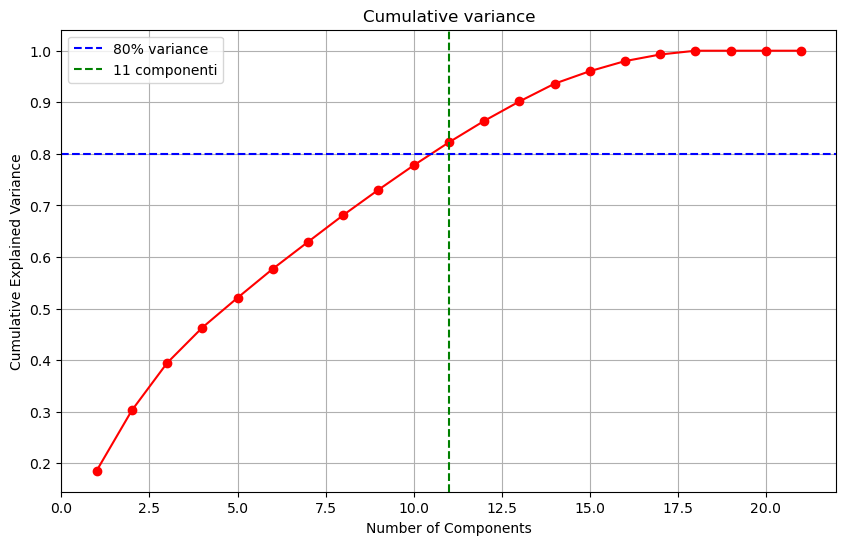

In [45]:
# Detailed analysis for 80%
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"MAIN RESULT:")

print(f"To explain at least 80% of the variance, we need {n_components_80} main components")
print(f"Cumulative variance with {n_components_80} components: {cumulative_variance[n_components_80-1]:.2%}")

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = dataset_clean.columns.tolist()
obesity_categories = dataset_clean["Obesity_Level"]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "ro-")
plt.axhline(y=0.80, color="b", linestyle="--", label="80% variance")
plt.axvline(x=n_components_80, color="g", linestyle="--", label=f'{n_components_80} componenti')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative variance")
plt.legend()
plt.grid(True)
plt.show()

Effective reduction: **-40%** dimensions while maintaining **80%** information

Balanced structure: No component too dominant

Regular progression: Gradual decrease in variance

Informative data: Prime components explain significant variance

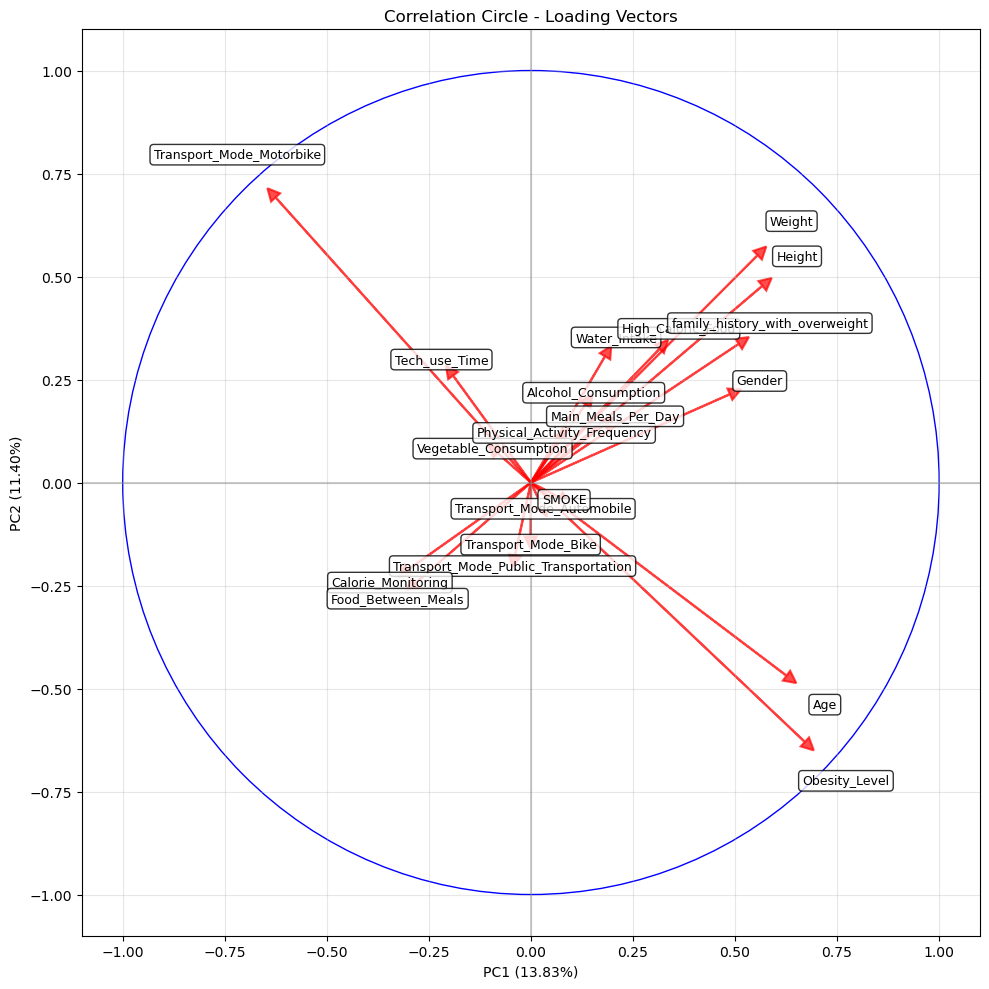

In [30]:
# ==========================
# 1) CORRELATION CIRCLE
# ==========================
plt.figure(figsize=(10,10))
ax = plt.gca()

# Draw the unit circle
circle = plt.Circle((0, 0), 1, color="blue", fill=False, linestyle="-", alpha=1)
ax.add_artist(circle)

loading_magnitudes = np.sqrt(loadings[:, 0]**2 + loadings[:, 1]**2)
top_indices = np.argsort(loading_magnitudes)

# Plot loading vectors
for i in top_indices:
    x, y = loadings[i, 0], loadings[i, 1]
    feature_name = feature_names[i]
    
    ax.arrow(0, 0, x, y, color= "red", alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.5)
    ax.text(x * 1.15, y * 1.15, feature_name, fontsize=9, ha="center", va="center", color="black", bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Ax settings
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.axhline(0, color="gray", alpha=0.4)
ax.axvline(0, color="gray", alpha=0.4)
ax.set_title("Correlation Circle - Loading Vectors")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

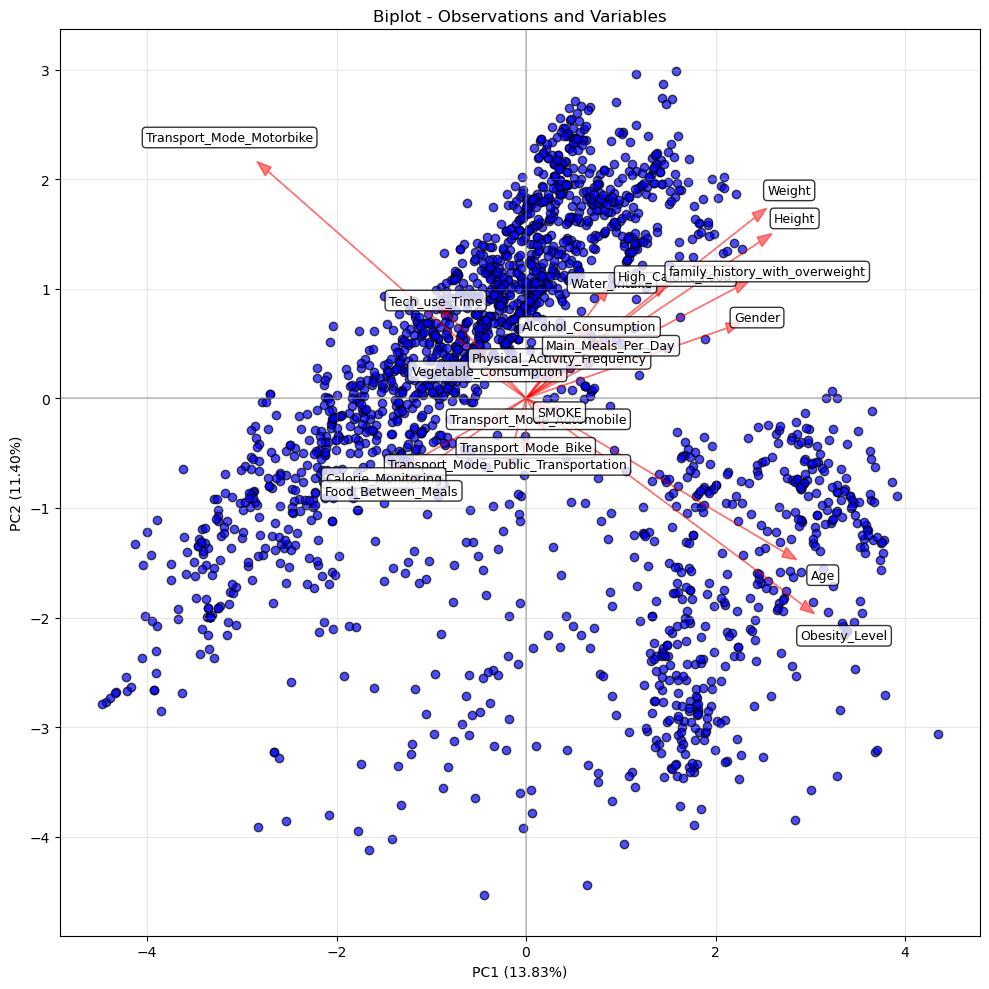

In [31]:
# ==========================
# 2) BIPLOT (OBSERVATIONS)
# ==========================
plt.figure(figsize=(10,10))
ax2 = plt.gca()

# Scatter plot of PCA scores (observations)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color="blue", edgecolor="black")

# Add variable loading vectors on the same plot (optional)
for i in top_indices:
    x, y = loadings[i, 0] * max(X_pca[:,0]), loadings[i, 1] * max(X_pca[:,1])  # rescale loadings
    feature_name = feature_names[i]
    
   
    ax2.arrow(0, 0, x, y, color = "red", alpha=0.5, head_width=0.1)
    ax2.text(x * 1.15, y * 1.15, feature_name, fontsize=9, ha="center", va="center", color= "black",bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

ax2.set_title("Biplot - Observations and Variables")
ax2.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%})")
ax2.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%})")
ax2.axhline(0, color="gray", alpha=0.4)
ax2.axvline(0, color="gray", alpha=0.4)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### K-MEANS 

In [32]:
dataset_pca = pd.DataFrame(X_pca[:,:2], columns=["PC1", "PC2"])
display(dataset_pca.head())

PC1       PC2
0 -1.943402 -0.641929
1 -2.434553 -1.337080
2 -0.008624  0.977320
3  0.372038 -1.611621
4 -1.112858 -0.317927

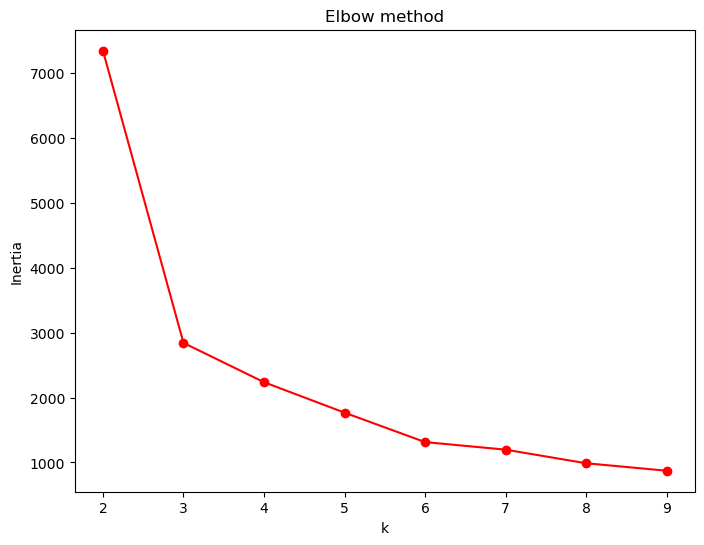

In [46]:
#ELBOW METHOD
inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, init = "k-means++", random_state=42)
    km.fit(dataset_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, "ro-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()


In [34]:
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    clusters = kmeans.fit_predict(dataset_pca)
    silhouette_avg = silhouette_score(dataset_pca, clusters)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.35372445076353065
For n_clusters = 3 The average silhouette_score is : 0.5302436205970771
For n_clusters = 4 The average silhouette_score is : 0.4608101377938027
For n_clusters = 5 The average silhouette_score is : 0.4490045191634636
For n_clusters = 6 The average silhouette_score is : 0.435435966007764
For n_clusters = 7 The average silhouette_score is : 0.4245398150929047
For n_clusters = 8 The average silhouette_score is : 0.43931195017037444
For n_clusters = 9 The average silhouette_score is : 0.41586440541894343


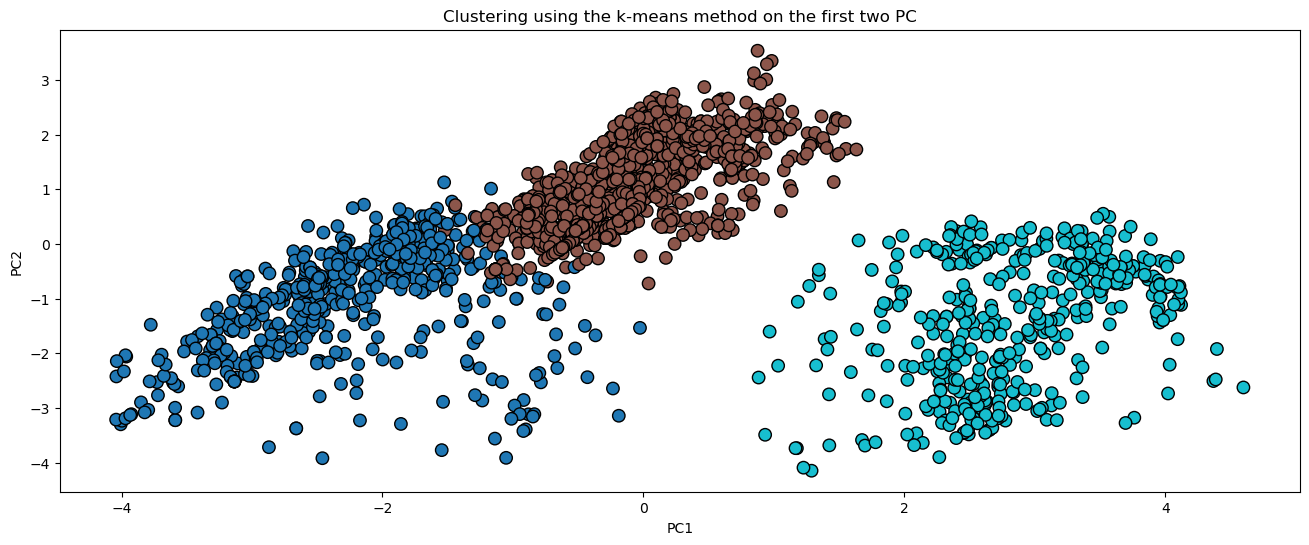

In [47]:
k = 3 # this is where the "elbow" is formed

kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(dataset_pca) #only the first two components

plt.figure(figsize=(16,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=80, cmap = "tab10", edgecolor="black", linewidth=1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering using the k-means method on the first two PC")
plt.show()

In [36]:
centroids = kmeans.cluster_centers_.T # coordinates of cluster
display(centroids)

array([[-2.02508646,  0.09187875,  2.1699429 ],
       [-0.88844728,  1.17610319, -1.75473126]])

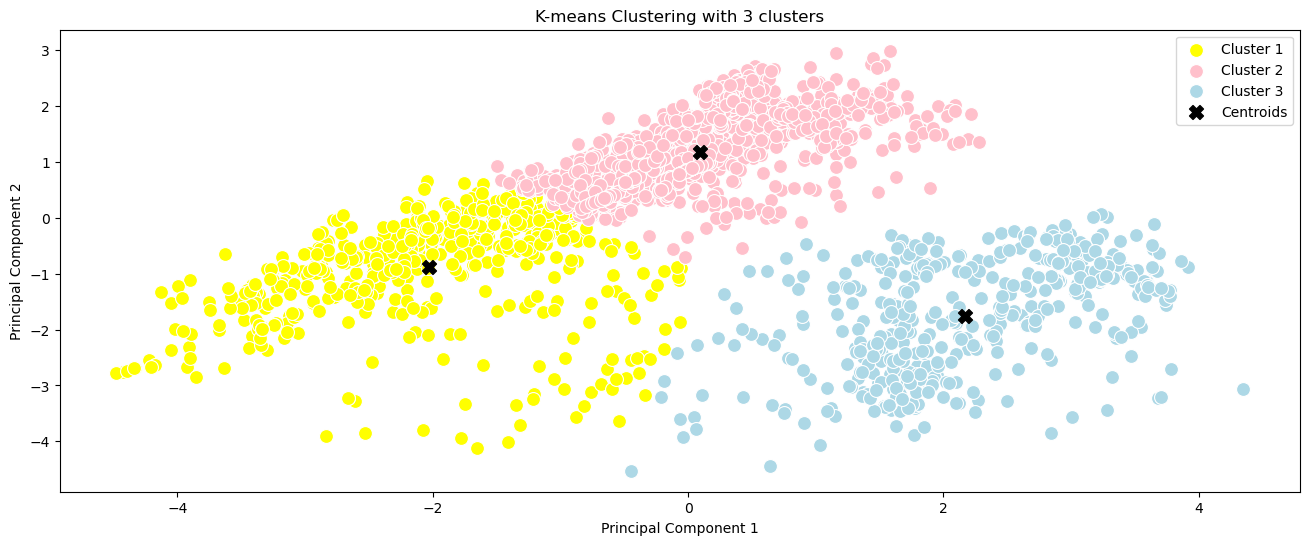

In [37]:
dataset_pca["clusters"] = clusters

colors = ["yellow", "pink", "lightblue"]

fig, ax = plt.subplots(figsize=(16, 6))

for k in range(0, 3):
    sns.scatterplot(x=dataset_pca["PC1"][dataset_pca.clusters == k], y=dataset_pca["PC2"][dataset_pca.clusters == k], color=colors[k], label="Cluster {}".format(k+1), s=100)

ax.scatter(centroids[0][:], centroids[1][:], marker="X", s=100, color="black", label="Centroids")
ax.set_title("K-means Clustering with 3 clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.legend()
plt.show()

In [38]:
kmeans.inertia_

2842.190849385255

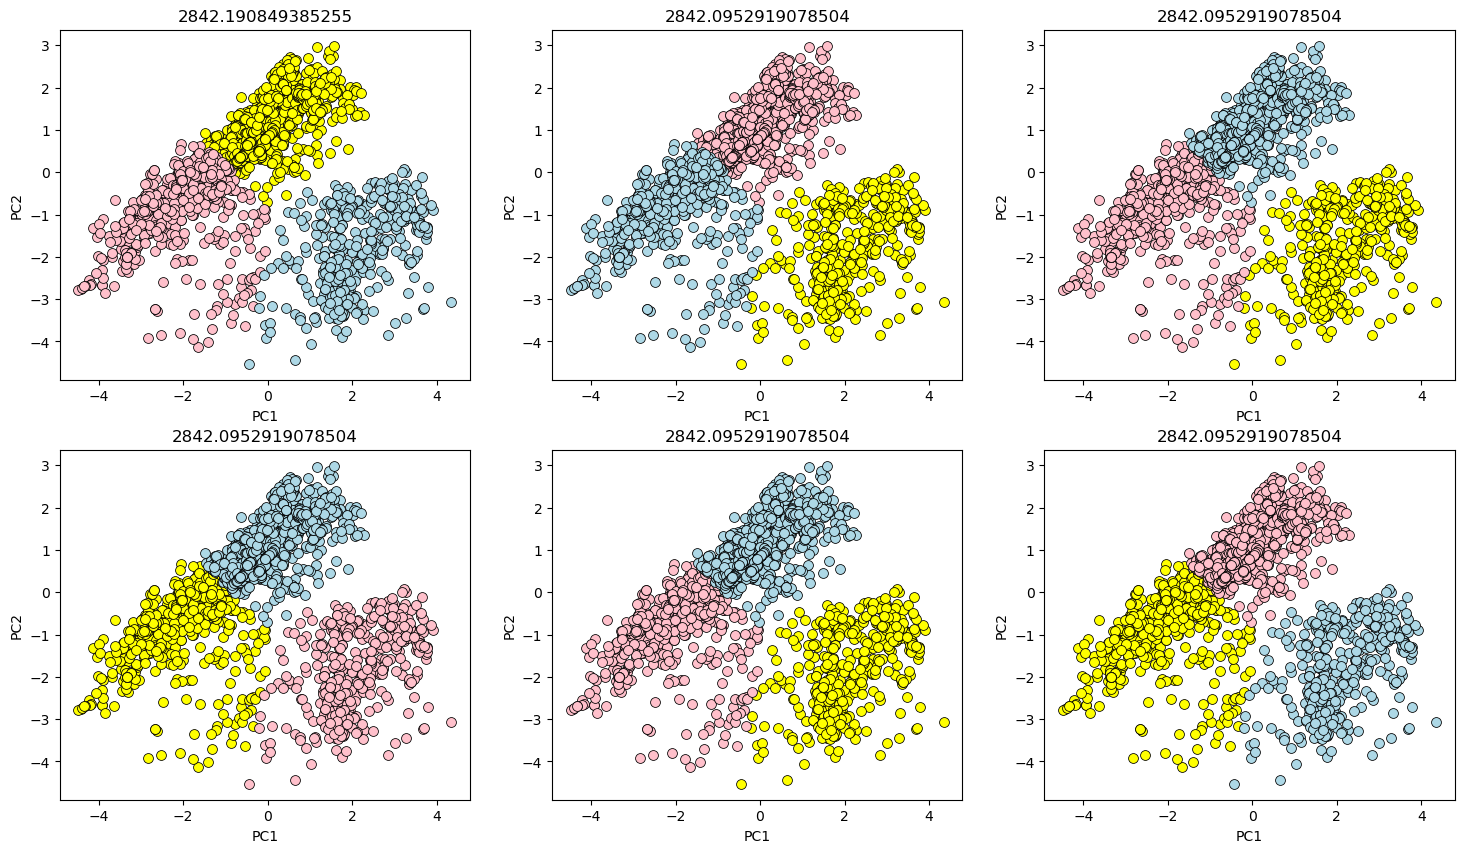

In [39]:
dataset_pca.drop(columns=["clusters"], inplace=True)
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
random_states = [15, 65, 73, 60, 10, 42]
for i in range(1, 7):
    kmeans = KMeans(n_clusters=3, n_init=1, init="random", random_state=random_states[i-1])
    kmeans.fit(dataset_pca) 
    dataset_pca["clusters"] = kmeans.labels_

    for k in range(0, 3):
        sns.scatterplot(x=dataset_pca["PC1"][dataset_pca.clusters == k], y=dataset_pca["PC2"][dataset_pca.clusters == k], color=colors[k], s=50, ax=ax[(i-1)//3, (i-1)%3],  edgecolor="black")
    
    ax[(i-1)//3, (i-1)%3].set_title(kmeans.inertia_)


plt.show()

In [40]:
dataset_clean["clusters"] = clusters
dataset_clean.groupby("clusters").mean()

Gender        Age      Height      Weight  \
clusters                                                
0         0.185792  20.888889  162.772313   59.342441   
1         0.595260  22.812215  173.027347  100.163172   
2         0.675325  31.889610  172.194805   86.831169   

          family_history_with_overweight  High_Caloric_Food  \
clusters                                                      
0                               0.464481           0.677596   
1                               0.952598           0.978122   
2                               0.913420           0.906926   

          Vegetable_Consumption  Main_Meals_Per_Day  Food_Between_Meals  \
clusters                                                                  
0                      2.386157            2.504554            1.429872   
1                      2.474932            2.747493            1.016408   
2                      2.337662            2.764069            1.088745   

             SMOKE  ...  Calorie_Monitoring  Physical_Activity_Frequency  \
clusters            ...                                                    
0         0.023679  ...            0.145719                     1.010929   
1         0.017320  ...            0.004558                     0.990884   
2         0.023810  ...            0.023810                     1.032468   

          Tech_use_Time  Alcohol_Consumption  Obesity_Level  \
clusters                                                      
0              0.732240             0.557377       1.296903   
1              0.720146             0.819508       4.047402   
2              0.458874             0.725108       3.054113   

          Transport_Mode_Automobile  Transport_Mode_Bike  \
clusters                                                   
0                          0.030965             0.001821   
1                          0.000000             0.000000   
2                          0.948052             0.012987   

          Transport_Mode_Motorbike  Transport_Mode_Public_Transportation  \
clusters                                                                   
0                         0.009107                              0.896175   
1                         0.000000                              0.989973   
2                         0.012987                              0.002165   

          Transport_Mode_Walking  
clusters                          
0                       0.061931  
1                       0.010027  
2                       0.023810  

[3 rows x 21 columns]

## 5) Summary and Interpretation
The dataset analysed contains 2,114 observations and 17 variables, with information on gender, age, height, weight, eating habits and physical activity, alcohol consumption, transport use, and a target variable relating to obesity levels. <br>
The number of missing values is very low (approximately 0–1%), relating to 6 observations, confirming the quality of the dataset. <br>
From the analysis conducted, we can state that the variables that show clear differences within the groups created refer to daily behaviours that therefore strongly influence the level of obesity. The variables in question are 'frequency of physical activity', 'type of transport used' and 'eating habits'. <br> The variable 'family history of overweight' also has a strong influence on the level of obesity, highlighting the importance of genetics. <br> We can obviously see that, in general, increasing age corresponds to a less favourable physical condition.